# Ciência de Dados para Negócios III - Trabalho 4 - Classificadores Estatísticos

**Aluno**: Antônio Arthur Silva de Lima

**Matrícula**: 508492

**Professor**: Victor Aguiar Evangelista de Farias

**Data**: 30/11/2025

In [23]:
# bibliotecas

## numerical and plots
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## processing and sampling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## ML Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.inspection import DecisionBoundaryDisplay

## Carregamento

In [2]:
diabetes = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)


## Split dos dados

In [3]:
y = diabetes[:, -1]
X = diabetes[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=508492)

## Tratamento dos dados

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors

Medidas de qualidade do ajuste (k=3):

Acurácia: 0.7273
Precisão: 0.7000
Sensibilidade: 0.5385
Especificidade: 0.8500
F1: 0.6087



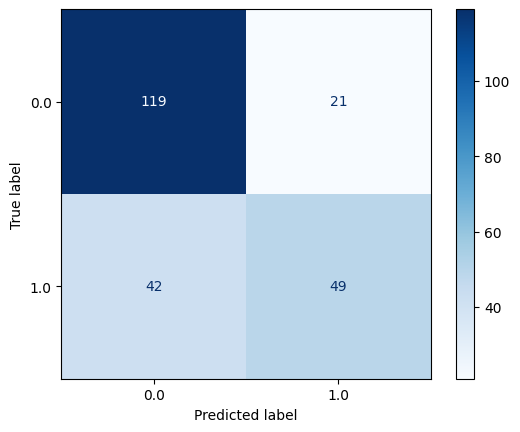

In [18]:
# ajuste
neigh_model = KNeighborsClassifier(n_neighbors=3)
neigh_model.fit(X_train, y_train)

# predição
y_hat_neigh = neigh_model.predict(X_test)

# qualidade do ajuste
acuracia = accuracy_score(y_test, y_hat_neigh)
precision = precision_score(y_test, y_hat_neigh)
recall = recall_score(y_test, y_hat_neigh)
f1 = f1_score(y_test, y_hat_neigh)

cm = confusion_matrix(y_test, y_hat_neigh)
tn, fp, fn, tp = cm.ravel()
specificity = tn/(tn+fp)

print(f'Medidas de qualidade do ajuste (k=3):\n')
print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Sensibilidade: {recall:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'F1: {f1:.4f}\n')

ConfusionMatrixDisplay.from_estimator(neigh_model, X_test, y_test, cmap='Blues')
plt.show()


Medidas de qualidade do ajuste (k=1)

Acurácia: 0.6753
Precisão: 0.6081
Sensibilidade: 0.4945
Especificidade: 0.7929
F1: 0.5455



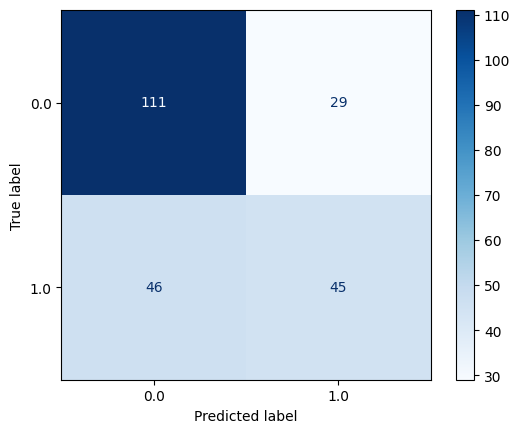


Medidas de qualidade do ajuste (k=5)

Acurácia: 0.6970
Precisão: 0.6615
Sensibilidade: 0.4725
Especificidade: 0.8429
F1: 0.5513



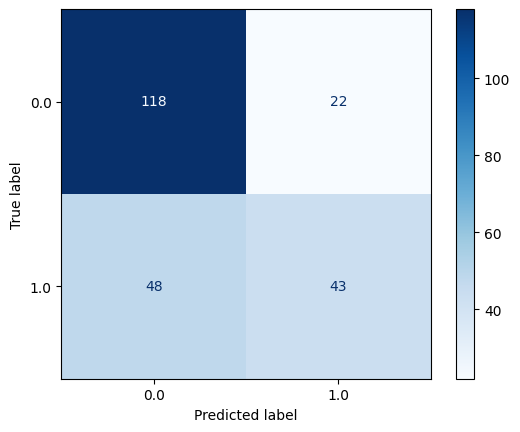


Medidas de qualidade do ajuste (k=10)

Acurácia: 0.6926
Precisão: 0.6923
Sensibilidade: 0.3956
Especificidade: 0.8857
F1: 0.5035



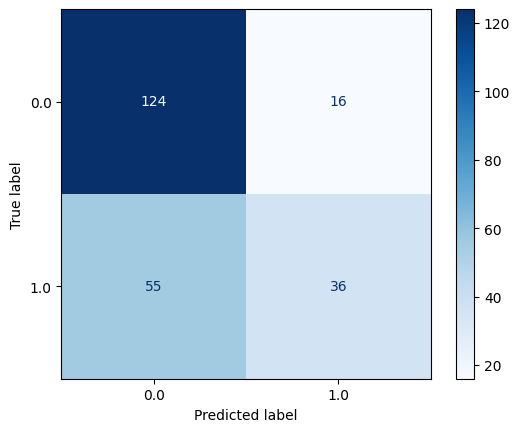


Medidas de qualidade do ajuste (k=20)

Acurácia: 0.7143
Precisão: 0.7551
Sensibilidade: 0.4066
Especificidade: 0.9143
F1: 0.5286



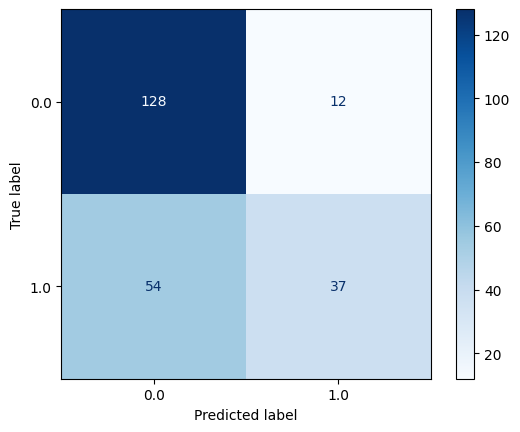

In [20]:
k_list = [1, 5, 10, 20]

for k in k_list:

  m = KNeighborsClassifier(n_neighbors=k)
  m.fit(X_train, y_train)
  y_hat = m.predict(X_test)

  acuracia = accuracy_score(y_test, y_hat)
  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat)
  f1 = f1_score(y_test, y_hat)
  cm = confusion_matrix(y_test, y_hat)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn/(tn+fp)

  print(f'\nMedidas de qualidade do ajuste (k={k})\n')
  print(f'Acurácia: {acuracia:.4f}')
  print(f'Precisão: {precision:.4f}')
  print(f'Sensibilidade: {recall:.4f}')
  print(f'Especificidade: {specificity:.4f}')
  print(f'F1: {f1:.4f}\n')

  ConfusionMatrixDisplay.from_estimator(m, X_test, y_test, cmap='Blues')
  plt.show()


## Decision Tree


Medidas de qualidade do ajuste (Árvore de Decisão)

Acurácia: 0.6710
Precisão: 0.5882
Sensibilidade: 0.5495
Especificidade: 0.7500
F1: 0.5682



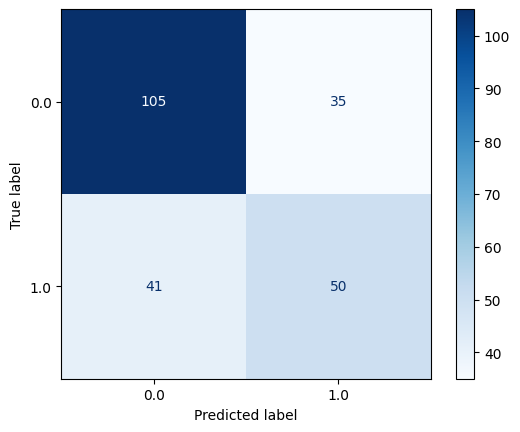

In [22]:
# ajuste
tree_model = DecisionTreeClassifier(random_state=508492)
tree_model.fit(X_train, y_train)

# predição
y_hat_tree = tree_model.predict(X_test)

# qualidade do ajuste
acuracia = accuracy_score(y_test, y_hat_tree)
precision = precision_score(y_test, y_hat_tree)
recall = recall_score(y_test, y_hat_tree)
f1 = f1_score(y_test, y_hat_tree)
cm = confusion_matrix(y_test, y_hat_tree)
tn, fp, fn, tp = cm.ravel()
specificity = tn/(tn+fp)

print(f'\nMedidas de qualidade do ajuste (Árvore de Decisão)\n')
print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Sensibilidade: {recall:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'F1: {f1:.4f}\n')

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Blues')
plt.show()


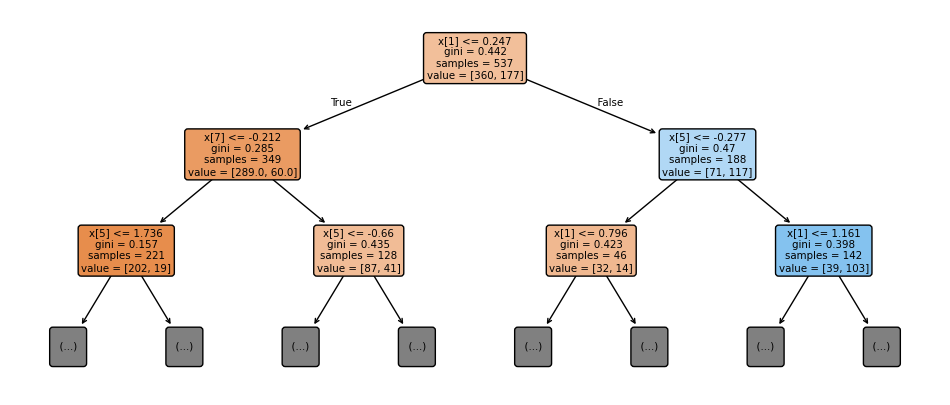

In [34]:
# graficando a Árvore de Decisão ajustada
plt.figure(figsize=(12, 5))
plot_tree(tree_model, filled=True, rounded=True, max_depth=2)
plt.show()

## Multi-layer Perceptron Classifier

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Medidas de qualidade do ajuste (Neural Netwok)

Acurácia: 0.7446
Precisão: 0.7500
Sensibilidade: 0.5275
Especificidade: 0.8857
F1: 0.6194



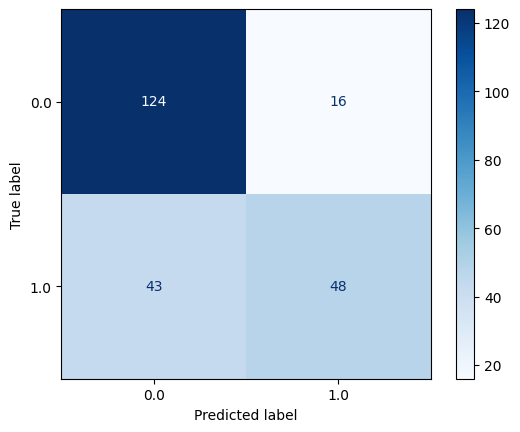

In [37]:
# ajuste
MLPC_model = MLPClassifier(random_state=508492)
MLPC_model.fit(X_train, y_train)

# predição
y_hat_MLPC = MLPC_model.predict(X_test)

# qualidade do ajuste
acuracia = accuracy_score(y_test, y_hat_MLPC)
precision = precision_score(y_test, y_hat_MLPC)
recall = recall_score(y_test, y_hat_MLPC)
f1 = f1_score(y_test, y_hat_MLPC)
cm = confusion_matrix(y_test, y_hat_MLPC)
tn, fp, fn, tp = cm.ravel()
specificity = tn/(tn+fp)

print(f'\nMedidas de qualidade do ajuste (Neural Netwok)\n')
print(f'Acurácia: {acuracia:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Sensibilidade: {recall:.4f}')
print(f'Especificidade: {specificity:.4f}')
print(f'F1: {f1:.4f}\n')

ConfusionMatrixDisplay.from_estimator(MLPC_model, X_test, y_test, cmap='Blues')
plt.show()


Medidas de qualidade do ajuste (2 neurônios)

Acurácia: 0.6061
Precisão: 0.0000
Sensibilidade: 0.5495
Especificidade: 0.7500
F1: 0.5682



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


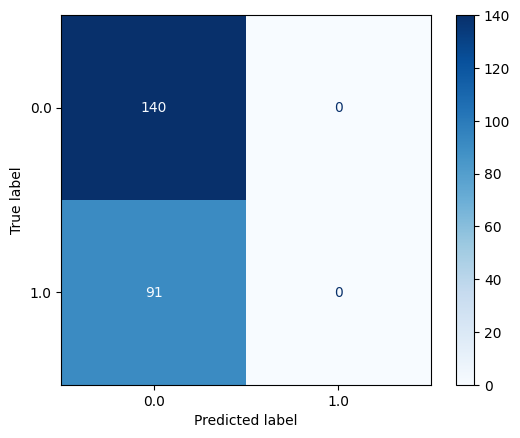


Medidas de qualidade do ajuste (10 neurônios)

Acurácia: 0.7143
Precisão: 0.6984
Sensibilidade: 0.5495
Especificidade: 0.7500
F1: 0.5682



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


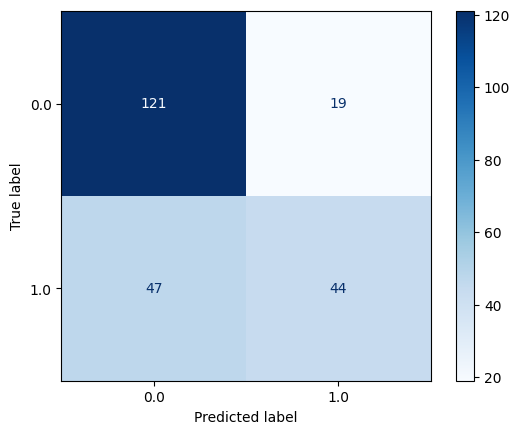


Medidas de qualidade do ajuste (50 neurônios)

Acurácia: 0.7143
Precisão: 0.6984
Sensibilidade: 0.5495
Especificidade: 0.7500
F1: 0.5682



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


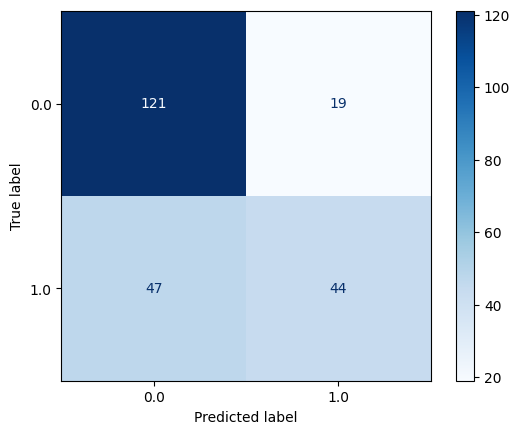


Medidas de qualidade do ajuste (200 neurônios)

Acurácia: 0.7100
Precisão: 0.6818
Sensibilidade: 0.5495
Especificidade: 0.7500
F1: 0.5682



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


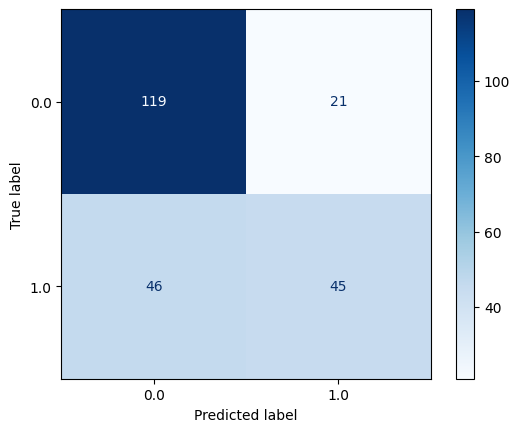

In [38]:
k_neurons = [2, 10, 50, 200]

for k in k_neurons:

  m = MLPClassifier(random_state=508492, hidden_layer_sizes=(k,))
  m.fit(X_train, y_train)
  y_hat = m.predict(X_test)

  acuracia = accuracy_score(y_test, y_hat)
  precision = precision_score(y_test, y_hat)
  recall = recall_score(y_test, y_hat_tree)
  f1 = f1_score(y_test, y_hat_tree)
  cm = confusion_matrix(y_test, y_hat_tree)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn/(tn+fp)

  print(f'\nMedidas de qualidade do ajuste ({k} neurônios)\n')
  print(f'Acurácia: {acuracia:.4f}')
  print(f'Precisão: {precision:.4f}')
  print(f'Sensibilidade: {recall:.4f}')
  print(f'Especificidade: {specificity:.4f}')
  print(f'F1: {f1:.4f}\n')

  ConfusionMatrixDisplay.from_estimator(m, X_test, y_test, cmap='Blues')
  plt.show()
